<a href="https://colab.research.google.com/github/ggaray99/datascience/blob/main/ProyectoParteIII%2BGaray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 **Este trabajo analiza el dataset AB_NYC_2019, que contiene información de alojamientos de Airbnb en Nueva York. En este caso se utilizó el mismo dataset que en el trabajo anterior.**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Carga del df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AB_NYC_2019.csv', delimiter=',')
print("Dimensiones:", df.shape)
df.head()


Dimensiones: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
# Análisis exploratorio

df.info()
df.describe()

# Reviso los nulos
df.isnull().sum()

# Elimino columnas no relevantes
df = df.drop(columns=['id', 'name', 'host_name', 'last_review'])

# Reemplazo nulos en reviews_per_month por 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

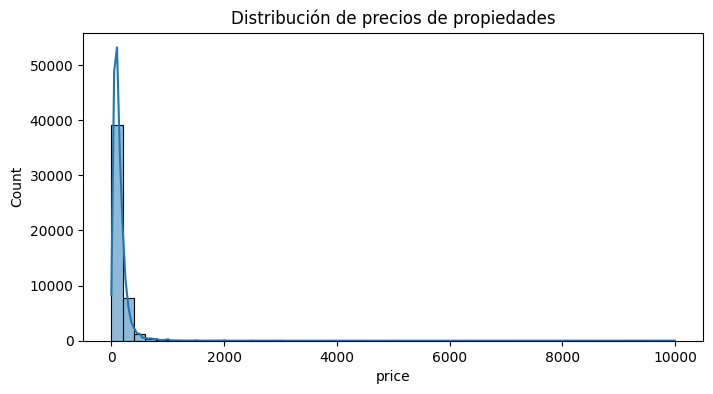

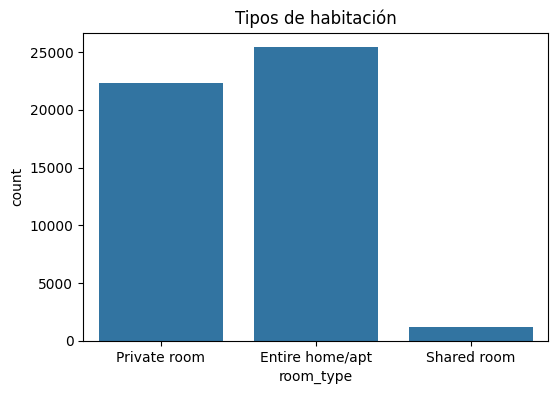

In [3]:
# 4) Visualizaciones básicas

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribución de precios de propiedades")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='room_type')
plt.title("Tipos de habitación")
plt.show()


In [11]:
# 5) Feature Selection (reducción de dimensionalidad)

# Convierto las variables categóricas a numéricas
le = LabelEncoder()
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    df[col] = le.fit_transform(df[col])

# Defino X e y
X = df.drop(columns=['price'])
y = df['price']

# Selecciono las 8 variables más relevantes (según F-test)
selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(X, y)

# Variables seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))


Características seleccionadas: ['neighbourhood_group', 'neighbourhood', 'longitude', 'room_type', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [6]:
# 6) Entrenamiento del modelo

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Escalamos variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [7]:
# 7) Evaluación de métricas

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 72.04
MSE: 39398.07
RMSE: 198.49
R²: 0.109


En este proyecto se aplicó un proceso completo de feature selection, modelado y evaluación utilizando el dataset Airbnb NYC 2019.
Mediante el método SelectKBest (F-test) se seleccionaron las ocho variables más relevantes para predecir el precio de un alojamiento.
Posteriormente se entrenó un modelo de Regresión Lineal, que obtuvo un coeficiente de determinación R² = 0.109, un error absoluto medio MAE = 72.04 USD y un error cuadrático medio RMSE = 198.49 USD.

Estos valores indican un desempeño modesto, propio de un modelo lineal sobre un problema con relaciones complejas y alta variabilidad.
Aun así, el modelo permite identificar las variables que más influyen en el precio y sirve como punto de partida para probar enfoques más avanzados en futuras iteraciones del análisis.

# 🔁 **Prueba con subconjuntos del dataset**

In [13]:
# Pruebo el modelo con subconjuntos del dataset original
for frac in [0.1, 0.3, 0.5]:
    print(f"\n🔹 Entrenando con el {int(frac*100)}% del dataset")

    # Se toma una muestra del dataset original
    sample_df = df.sample(frac=frac, random_state=42)

    X_sub = sample_df[selected_features]
    y_sub = sample_df['price']

    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_sub_scaled = scaler.fit_transform(X_train_sub)
    X_test_sub_scaled = scaler.transform(X_test_sub)

    model_sub = LinearRegression()
    model_sub.fit(X_train_sub_scaled, y_train_sub)
    y_pred_sub = model_sub.predict(X_test_sub_scaled)

    mae_sub = mean_absolute_error(y_test_sub, y_pred_sub)
    r2_sub = r2_score(y_test_sub, y_pred_sub)

    print(f"MAE: {mae_sub:.2f} | R²: {r2_sub:.3f}")



🔹 Entrenando con el 10% del dataset
MAE: 71.97 | R²: 0.177

🔹 Entrenando con el 30% del dataset
MAE: 74.65 | R²: 0.066

🔹 Entrenando con el 50% del dataset
MAE: 72.16 | R²: 0.146
